In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글 표현위함

In [2]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

### 1. 이름순으로 정렬하시오

In [3]:
sr.sort_index()

김철수1    88
김철수2    30
김철수3    25
이순신     90
이이      76
이황      80
임꺽정     55
정난정     60
정도전     76
홍길동     90
Name: 국어점수, dtype: int64

In [4]:
sr['김철수1']

88

### 2. 키보드로 입력 받아 검색된 이름의 점수를 구하시오

In [6]:
a=10
b=20
s = f'a={a} b={b}' # 3.5버전
# s = 'a=%d b=%d'%(a,b)
print(s)

a=10 b=20


In [5]:
search = input('이름을 입력하세요:')
sr[search]
# sr['%s'%search]

이름을 입력하세요홍길동


90

### 3. 데이터를 다음과 같이 출력하시오

In [ ]:
(0~59:F , 60~69:D, 70~79:C, 80~89:B, 90~100:A
---------------------
    이름    국어   학점
---------------------
    홍길동  70	    C
    ...
    김철수3 25      F


In [7]:
print('-'*22)
print('이름','국어', '학점', sep='\t')
print('-'*22)
sr_cut = pd.cut(sr,[-1,59,69,79,89,100],labels=['F','D','C', 'B', 'A'])
sr_cut

----------------------
이름	국어	학점
----------------------


홍길동     A
이순신     A
임꺽정     F
정난정     D
이이      C
이황      B
정도전     C
김철수1    B
김철수2    F
김철수3    F
Name: 국어점수, dtype: category
Categories (5, object): [F < D < C < B < A]

In [8]:
for n,k,f in zip( sr.index, sr, sr_cut):
    print( n,k,f, sep='\t')

홍길동	90	A
이순신	90	A
임꺽정	55	F
정난정	60	D
이이	76	C
이황	80	B
정도전	76	C
김철수1	88	B
김철수2	30	F
김철수3	25	F


### 4. 국어 점수 50점 이하는 가산점 20%, 50점 초과는 가산점 10%

In [ ]:
sr.apply( lambda v: v*1.2 if v<=50 else v*1.1)

In [53]:
sr[sr<=50] = sr[sr<=50]*1.2
sr[sr>50] = sr[sr>50]*1.1
sr

홍길동     99.0
이순신     99.0
임꺽정     60.5
정난정     66.0
이이      83.6
이황      88.0
정도전     83.6
김철수1    96.8
김철수2    36.0
김철수3    30.0
Name: 국어점수, dtype: float64

### 5. 국어점수 10%, 50%, 90%에 해당하는 값을 구하시오

In [55]:
sr.quantile([0.1,0.5,0.9])

0.1    29.5
0.5    76.0
0.9    90.0
Name: 국어점수, dtype: float64

### 6. 각 국어 점수에 대한 개수를 구하시오

In [57]:
sr.value_counts()

90    2
76    2
30    1
60    1
25    1
88    1
55    1
80    1
Name: 국어점수, dtype: int64

### 7. 국어점수에 대한 boxplot을 그리시오

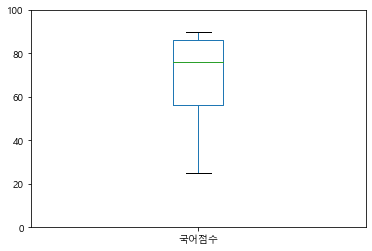

In [9]:
sr.plot(kind = 'box', ylim=(0,100))
plt.show()

### 8. 국어 점수를 10개(0~100점을) 로 분할한 경우 각 점수별 도수분포표를 구하고(아래이미지참조) 히스토그램을 구하시오

<img src="image/sample.jpg">

In [30]:
print('계급','계급값', '도수','누적도수','상대도수', sep='\t')
print('-'*50)
# a = pd.cut(sr,[0,10,20,30,40,50,60,70,80,90,100]).value_counts().sort_index()
result = pd.cut(sr,range(0,101,10)).value_counts().sort_index()
result

계급	계급값	도수	누적도수	상대도수
--------------------------------------------------


(0, 10]      0
(10, 20]     0
(20, 30]     2
(30, 40]     0
(40, 50]     0
(50, 60]     2
(60, 70]     0
(70, 80]     3
(80, 90]     3
(90, 100]    0
Name: 국어점수, dtype: int64

In [11]:
cv = range( 5,96,5) #계급값

In [31]:
#누적도수
srsum = []
defalts = 0
for i in result:
    defalts += i
    srsum.append(defalts)
srsum

[0, 0, 2, 2, 2, 4, 4, 7, 10, 10]

In [32]:
result.cumsum()

(0, 10]       0
(10, 20]      0
(20, 30]      2
(30, 40]      2
(40, 50]      2
(50, 60]      4
(60, 70]      4
(70, 80]      7
(80, 90]     10
(90, 100]    10
Name: 국어점수, dtype: int64

In [33]:
result/result.sum()

(0, 10]      0.0
(10, 20]     0.0
(20, 30]     0.2
(30, 40]     0.0
(40, 50]     0.0
(50, 60]     0.2
(60, 70]     0.0
(70, 80]     0.3
(80, 90]     0.3
(90, 100]    0.0
Name: 국어점수, dtype: float64

In [26]:
a=10
s=f'{a:5}'
print(s)

   10


In [38]:
for idx,b,c,d,e in zip(result.index, cv, result, result.cumsum(), result/result.sum() ):
#     print(i,b,c,d,e, sep='\t')
#     print(idx,b,c,d,e, sep='\t')
    print( f'{str(idx):10}{b:5}{c:5}{d:5}{e:5}' )

(0, 10]       5    0    0  0.0
(10, 20]     10    0    0  0.0
(20, 30]     15    2    2  0.2
(30, 40]     20    0    2  0.0
(40, 50]     25    0    2  0.0
(50, 60]     30    2    4  0.2
(60, 70]     35    0    4  0.0
(70, 80]     40    3    7  0.3
(80, 90]     45    3   10  0.3
(90, 100]    50    0   10  0.0


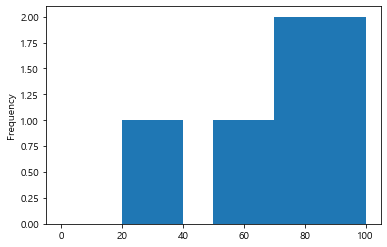

In [99]:
sr.plot(kind='hist', bins=list(range(0,101,10)))
plt.show()

### 9. 과일의 비율을 파이차트로 그리시오

In [43]:
fruit=pd.Series( [10,20,30,50],index=['사과','딸기','포도','수박'],name='과일' )

In [41]:
fruit

사과    10
딸기    20
포도    30
수박    50
dtype: int64

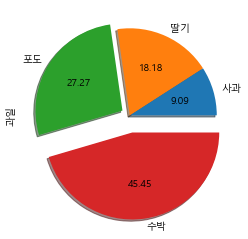

In [48]:
fruit.plot(kind = 'pie',autopct='%.2f',
           shadow=True, explode=[0,0,0.1,0.2])
plt.show()